# **1. Load the dataset**

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
dataset=pd.read_csv('Heart_Disease_Data.txt',na_values='?')
dataset.to_csv('cleve.csv',index=None)

In [279]:
ds=pd.read_csv('cleve.csv')

In [280]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trestbps        303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalach         303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slop            303 non-null    int64  
 11  ca              299 non-null    float64
 12  thal            301 non-null    float64
 13  pred_attribute  303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [281]:
ds.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [282]:
ds.shape

(303, 14)

# **2. Explore the Data**
Let's describe the dataset using descriptive statistics.

In [283]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Check if there are any Null values in the dataset

In [284]:
ds.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [285]:
print("No of Nan values in the dataframe are : ", sum(ds.isnull().any()))

No of Nan values in the dataframe are :  2


In [286]:
# pred_attribute is the target attribute 
ds.pred_attribute.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: pred_attribute, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f837930ec50>,
      dtype=object)

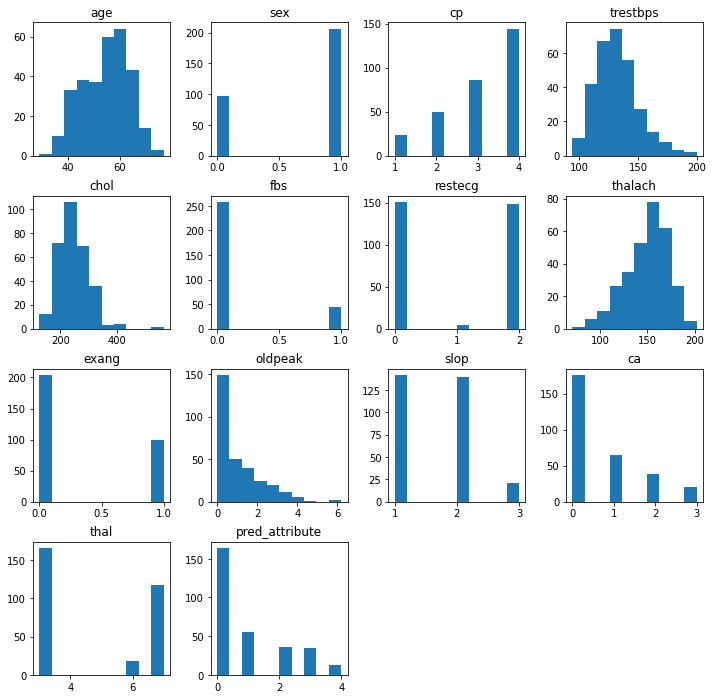

In [287]:
ds.hist(figsize=(12,12), grid=False)

target attribute classes

*   0 - healthy
*   1 - sick level 1


*   2 - sick level 2
*   3 - sick level 3
*   4 - sick level 4





Text(0.5, 1.0, 'Heart Disease Frequency for Ages')

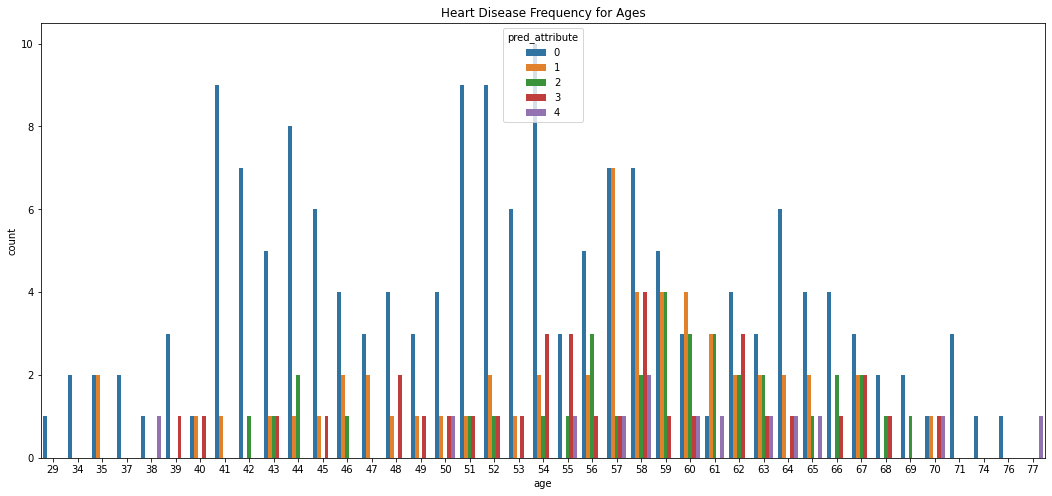

In [288]:
plt.figure(figsize=(18,8))
sns.countplot(x='age', data = ds, hue="pred_attribute")
plt.title('Heart Disease Frequency for Ages')

count    303.000000
mean       0.937294
std        1.228536
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        4.000000
Name: pred_attribute, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


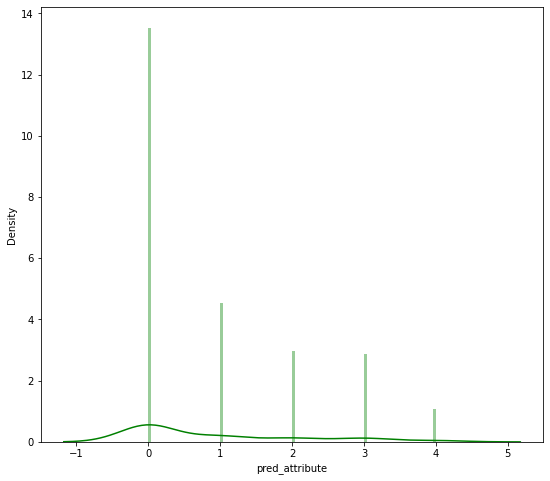

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns
print(ds['pred_attribute'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(ds['pred_attribute'], color='g', bins=100, hist_kws={'alpha': 0.4});

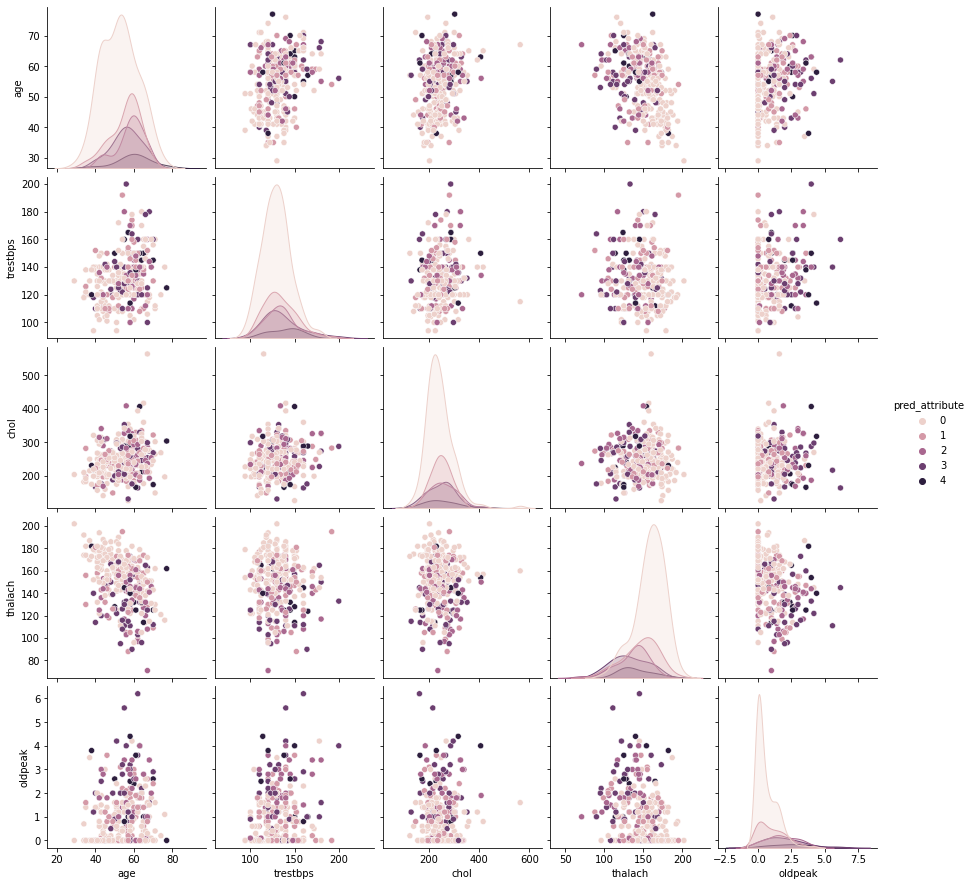

In [290]:
sns.pairplot(ds.loc[:, ['age','trestbps','chol','thalach','oldpeak', 'pred_attribute']], hue='pred_attribute')

In [291]:
data = pd.get_dummies(ds, drop_first=False)
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute'],
      dtype='object')

In [292]:
ds['ca'] = ds['ca'].fillna(ds['ca'].mode()[0])
ds['thal'] = ds['thal'].fillna(ds['thal'].mode()[0])

# **3. Build the Predictive Model**

In [293]:
from sklearn.model_selection import train_test_split
import numpy as np

In [294]:
y = ds['pred_attribute']
ds.drop('pred_attribute', axis=1, inplace=True)
x = ds

In [295]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [296]:
y_train.shape

(227,)

In [297]:
x_train.shape

(227, 13)

In [298]:
x_test.shape

(76, 13)

In [299]:
y_test.shape

(76,)

##3.1- k Nearest Neighbor (KNN)

In [300]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [301]:
p=knn.predict_proba(x_test)

# **4. Evaluate the Model**

In [305]:
from sklearn.metrics import log_loss
log_loss(y_test,p)

5.06120584000712

In [307]:
#calculate average
i=0
average=0
for j in range(0,10):
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    knn.fit(x_train,y_train)
    pred = knn.predict_proba(x_test)
    i=log_loss(y_test,pred)
    average=average+i
average=average/10
print(average)

5.13325203583789
